In [41]:
# Dependencies
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                   consumer_secret,
                   access_token,
                   access_token_secret)
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [42]:
# Target Search Terms
target_users = ["@CNN", "@nytimes", "@BBC", "@CBSNews", "@FoxNews"]

results_list = []
tweet_text_df = []
counter = 0

for user in target_users:
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    for x in range(5):
        public_tweets = api.user_timeline(user, count = 20, page=x)
        
        for tweet in public_tweets:
            counter = counter + 1
            results = analyzer.polarity_scores(tweet['text'])
            compound = results["compound"]
            pos = results["pos"]
            neg = results["neg"]                              
            neu = results["neu"]
            text = tweet['text']
                        
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            
            tweet_list = {"Username": user,
                "Tweet Text": text,
                "Compound": (compound),
                "Positive": (pos),
                "Negative": (neg),
                "Neutral Score": (neu),
                "Tweet Number": (counter)}
            tweet_text_df.append(tweet_list)
    counter = 0
    user_results = {"Username": user,
                "Compound Score": np.mean(compound_list),
                "Positive Score": np.mean(positive_list),
                "Negative Score": np.mean(negative_list),
                "Neutral Score": np.mean(neutral_list),
                "Tweet Count": len(compound_list)}
    
    
    results_list.append(user_results)
    
    
    
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")

User: @CNN
Compound: -0.108
Positive: 0.036
Negative: 0.078
Neutral: 0.886
User: @nytimes
Compound: -0.107
Positive: 0.059
Negative: 0.098
Neutral: 0.843
User: @BBC
Compound: 0.135
Positive: 0.118
Negative: 0.061
Neutral: 0.822
User: @CBSNews
Compound: -0.155
Positive: 0.063
Negative: 0.138
Neutral: 0.798
User: @FoxNews
Compound: 0.105
Positive: 0.115
Negative: 0.076
Neutral: 0.809


In [43]:
tweet_df = pd.DataFrame(tweet_text_df).set_index("Username").round(3)
tweet_df.to_csv("News Sites with Tweets Included.csv", index=False)
tweet_df.head()

,Compound,Negative,Neutral Score,Positive,Tweet Number,Tweet Text
Username,,,,,,
@CNN,-0.422,0.128,0.872,0.000,1,A teen broke into a home in California shortly...
@CNN,-0.340,0.124,0.876,0.000,2,Northern California's deadly Carr Fire nearly ...
@CNN,-0.026,0.108,0.788,0.103,3,Pope Francis has accepted the resignation of C...
@CNN,-0.814,0.345,0.655,0.000,4,"""She doesn't want to let go."" A mourning orca ..."
@CNN,-0.557,0.141,0.859,0.000,5,Disney has announced the cast for 'Star Wars: ...


In [44]:
user_results_df = pd.DataFrame(results_list).set_index("Username").round(3)

user_results_df

,Compound Score,Negative Score,Neutral Score,Positive Score,Tweet Count
Username,,,,,
@CNN,-0.108,0.078,0.886,0.036,100
@nytimes,-0.107,0.098,0.843,0.059,100
@BBC,0.135,0.061,0.822,0.118,100
@CBSNews,-0.155,0.138,0.798,0.063,100
@FoxNews,0.105,0.076,0.809,0.115,100


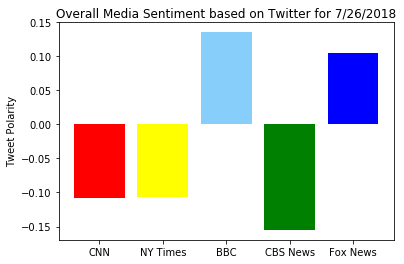

In [45]:
# The colors of each tick location of the bar graph
colors = ["red", "yellow","lightskyblue", "green","blue"]
y_vals = user_results_df["Compound Score"]
#  The bar chart itself
plt.bar(target_users, y_vals, color = colors, align = "center")
tick_locations=[user for user in target_users]
plt.xticks(tick_locations, ["CNN", "NY Times", "BBC", "CBS News", "Fox News"])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment based on Twitter for 7/26/2018")
plt.savefig("Overall Media Sentiment.png")

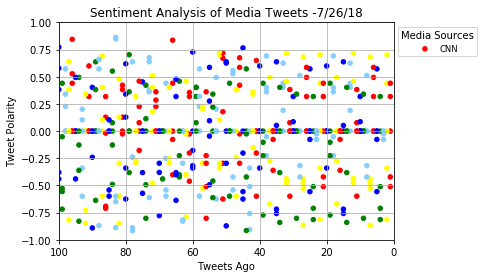

In [54]:
colors = ["red", "yellow","lightskyblue", "green","blue"]
names= ["CNN", "NY Times", "BBC", "CBS News", "Fox News"]
tweet_df.plot(kind = "scatter", x = "Tweet Number",
              y = "Compound", color = colors, grid = True)
plt.ylim(-1, 1)
plt.xlim(100,0)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")


# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", labels = names,
                 numpoints=1, scatterpoints=1,
                 loc= "upper left", bbox_to_anchor=(1,1), title="Media Sources",
                 labelspacing=0.5)
lgnd
plt.title("Sentiment Analysis of Media Tweets -7/26/18")
plt.savefig("Sentiment Analysis.png")